In [ ]:
# PYTHON program to plot a cobweb plot

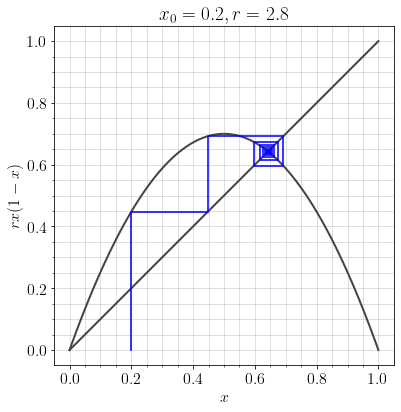

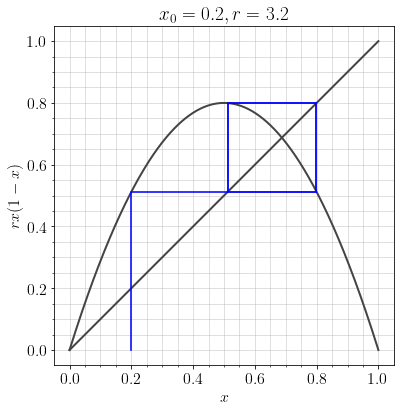

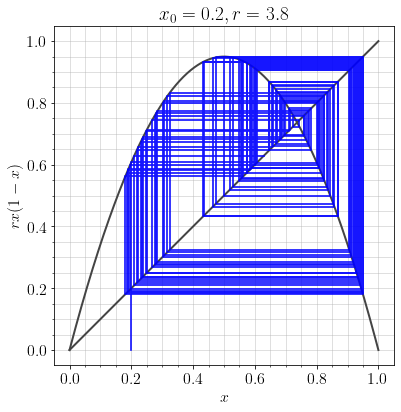

In [141]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
# plotting simple CobWeb plots with code from: https://scipython.com/blog/cobweb-plots/
# Use LaTeX throughout the figure for consistency
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    
    
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]

        py[n] = f(px[n-1], r)

        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel(f.latex_label)
    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))

    plt.show() 
    # for plotting the figure as a .png : plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')

plot_cobweb(func, 2.8, 0.2)
plot_cobweb(func, 3.2, 0.2)
plot_cobweb(func, 3.8, 0.2, 200)


In [ ]:
# Plotting CobWeb plots of the outputed/predicted notes

In [5]:
# as being a one-case study: arr_output represents the outputed pitches given arr_input 
arr_input= np.arange(128)
arr_output= [63, 63, 68, 99, 87, 87, 87, 99, 63, 79, 83, 87, 56, 63, 87, 83, 63, 63, 68, 87, 44, 63, 87, 87, 99, 87, 83, 63, 99, 87, 68, 99, 68, 63, 87, 75, 56, 68, 99, 87, 63, 99, 99, 87, 87, 63, 63, 99, 87, 75, 75, 99, 99, 75, 59, 87, 68, 63, 79, 99, 83, 99, 68, 99, 87, 68, 68, 63, 75, 99, 75, 99, 79, 68, 87, 75, 56, 87, 75, 68, 99, 70, 99, 79, 99, 82, 97, 68, 75, 63, 87, 99, 99, 75, 68, 87, 87, 87, 67, 63, 84, 99, 87, 87, 79, 82, 99, 87, 99, 63, 75, 99, 99, 99, 85, 99, 44, 87, 87, 87, 99, 87, 87, 84, 87, 63, 79, 82]

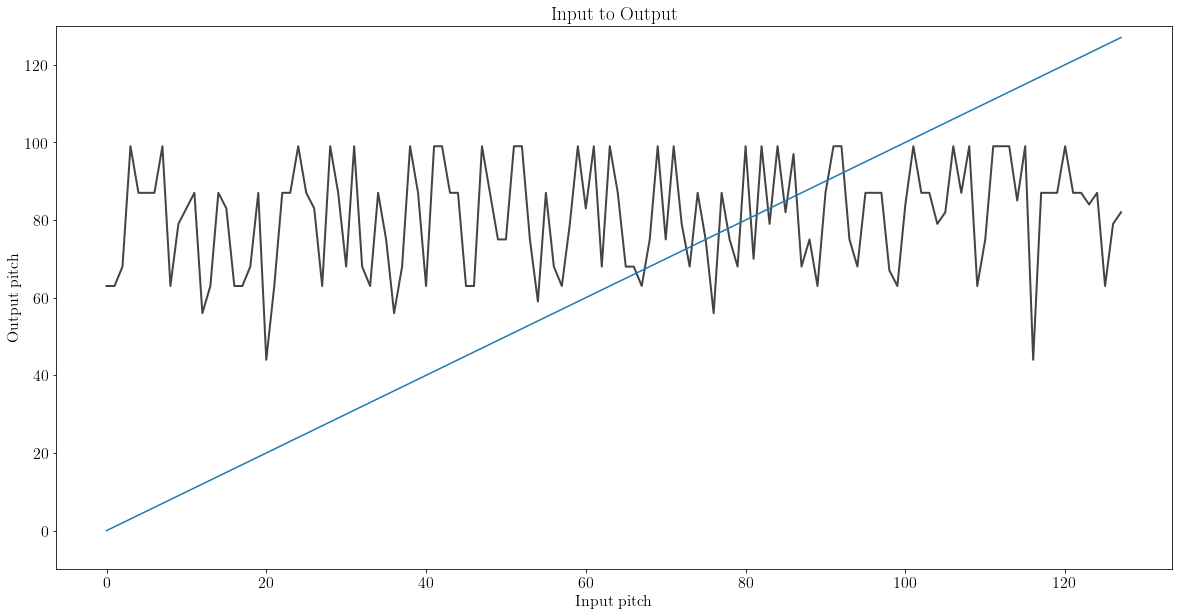

In [50]:
f = plt.figure(figsize=(20,10)) 
plt.plot(arr_input,arr_output, c='#444444', lw=2)
plt.plot(arr_input,arr_input)
plt.ylabel('Output pitch')
plt.xlabel('Input pitch')
plt.ylim(-10,130)
plt.title("Input to Output")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

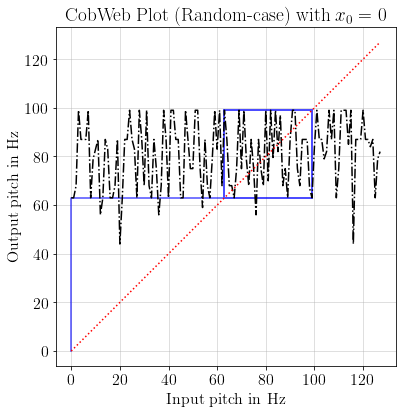

In [131]:
# standard case with randomized factor
np_out = np.array(arr_output)
fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
ax = fig.add_subplot(111)

nmax = 120 # in cobweb ex is 40
x0 = 0
px, py = np.zeros((2,nmax+1,2))
px[0], py[0] = x0, 0
for n in range(1, nmax, 2):
    px[n] = px[n-1]
    py[n][1] = np_out[int(px[n-1][1])]
    px[n+1] = py[n]
    py[n+1] = py[n]

    # Plot the path traced out by the iteration.
ax.plot(px, py, c='b', alpha=0.7)
ax.plot(arr_input,arr_output,'k-.')
ax.plot(arr_input,arr_input, 'r:')
#ax.minorticks_on()
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Input pitch in Hz')
ax.set_ylabel('Output pitch in Hz')
ax.set_title('CobWeb Plot (Random-case) with $x_0 = {0}$')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

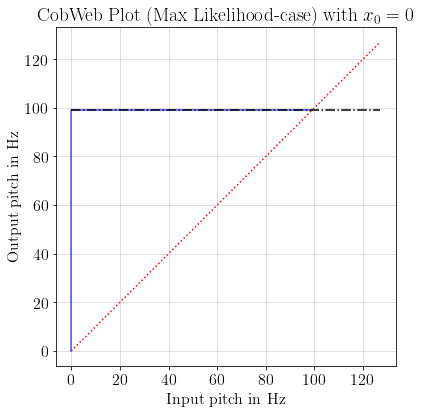

In [137]:
arr_output = np.full((128,), 99)
# case with RNN outputing always the note with highest prob. at each prediction step
np_out = np.array(arr_output)
fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
ax = fig.add_subplot(111)

nmax = 120 # in cobweb ex is 40
x0 = 0
px, py = np.zeros((2,nmax+1,2))
px[0], py[0] = x0, 0
for n in range(1, nmax, 2):
    px[n] = px[n-1]
    py[n][1] = np_out[int(px[n-1][1])]
    px[n+1] = py[n]
    py[n+1] = py[n]

    # Plot the path traced out by the iteration.
ax.plot(px, py, c='b', alpha=0.7)
ax.plot(arr_input,arr_output,'k-.')
ax.plot(arr_input,arr_input, 'r:')
#ax.minorticks_on()
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Input pitch in Hz')
ax.set_ylabel('Output pitch in Hz')
ax.set_title('CobWeb Plot (Max Likelihood-case) with $x_0 = {0}$')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

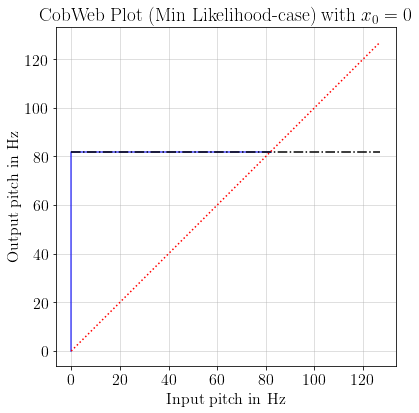

In [138]:
# case outputting note with least probability at each prediction step
arr_output = np.full((128,), 82)
np_out = np.array(arr_output)
fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
ax = fig.add_subplot(111)

nmax = 120 # in cobweb ex is 40
x0 = 0
px, py = np.zeros((2,nmax+1,2))
px[0], py[0] = x0, 0
for n in range(1, nmax, 2):
    px[n] = px[n-1]
    py[n][1] = np_out[int(px[n-1][1])]
    px[n+1] = py[n]
    py[n+1] = py[n]

    # Plot the path traced out by the iteration.
ax.plot(px, py, c='b', alpha=0.7)
ax.plot(arr_input,arr_output,'k-.')
ax.plot(arr_input,arr_input, 'r:')
#ax.minorticks_on()
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Input pitch in Hz')
ax.set_ylabel('Output pitch in Hz')
ax.set_title('CobWeb Plot (Min Likelihood-case) with $x_0 = {0}$')
plt.show